#  EXPLORATORY ANALYSIS ON VIDEO GAMES AROUND THE WORLD

This dataset contains a list of video games with sales greater than 100,000 copies. 

Rank - Ranking of overall sales

Name - The games name

Platform - Platform of the games release (i.e. PC,PS4, etc.)

Year - Year of the game's release

Genre - Genre of the game

Publisher - Publisher of the game

NA_Sales - Sales in North America (in millions)

EU_Sales - Sales in Europe (in millions)

JP_Sales - Sales in Japan (in millions)

Other_Sales - Sales in the rest of the world (in millions)

Global_Sales - Total worldwide sales.

In [41]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

In [139]:
#observing the first 5 rows of our dataset
df = pd.read_csv("../Dataset/vgsales.csv")

In [140]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [111]:
# checking total rows and columns
df.shape

(16598, 11)

In [149]:
df.iloc[2000]

Rank                                2002
Name            F-Zero: Maximum Velocity
Platform                             GBA
Year                              2001.0
Genre                             Racing
Publisher                       Nintendo
NA_Sales                            0.39
EU_Sales                            0.16
JP_Sales                            0.37
Other_Sales                         0.12
Global_Sales                        1.04
Name: 2000, dtype: object

In [124]:
#checking for missing values
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [117]:
df.loc[df["Platform"] == "GBA"]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
25,26,Pokemon Ruby/Pokemon Sapphire,GBA,2002.0,Role-Playing,Nintendo,6.06,3.90,5.38,0.50,15.85
58,59,Pokemon FireRed/Pokemon LeafGreen,GBA,2004.0,Role-Playing,Nintendo,4.34,2.65,3.15,0.35,10.49
130,131,Pokémon Emerald Version,GBA,2004.0,Role-Playing,Nintendo,2.57,1.58,2.06,0.21,6.41
162,163,Super Mario Advance,GBA,2001.0,Platform,Nintendo,3.14,1.24,0.91,0.20,5.49
163,164,Mario Kart: Super Circuit,GBA,2001.0,Racing,Nintendo,2.62,1.64,0.99,0.23,5.47
...,...,...,...,...,...,...,...,...,...,...,...
16556,16559,Super Robot Taisen: Original Generation,GBA,2002.0,Role-Playing,Banpresto,0.01,0.00,0.00,0.00,0.01
16563,16566,Mortal Kombat: Deadly Alliance,GBA,2002.0,Fighting,Midway Games,0.01,0.00,0.00,0.00,0.01
16582,16585,Planet Monsters,GBA,2001.0,Action,Titus,0.01,0.00,0.00,0.00,0.01
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01


In [135]:
df.loc[df["Publisher"].isnull()]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
1303,1305,Triple Play 99,PS,NaN,Sports,NaN,0.81,0.55,0.00,0.10,1.46
1662,1664,Shrek / Shrek 2 2-in-1 Gameboy Advance Video,GBA,2007.0,Misc,NaN,0.87,0.32,0.00,0.02,1.21
2222,2224,Bentley's Hackpack,GBA,2005.0,Misc,NaN,0.67,0.25,0.00,0.02,0.93
3159,3161,Nicktoons Collection: Game Boy Advance Video V...,GBA,2004.0,Misc,NaN,0.46,0.17,0.00,0.01,0.64
3166,3168,SpongeBob SquarePants: Game Boy Advance Video ...,GBA,2004.0,Misc,NaN,0.46,0.17,0.00,0.01,0.64
3766,3768,SpongeBob SquarePants: Game Boy Advance Video ...,GBA,2004.0,Misc,NaN,0.38,0.14,0.00,0.01,0.53
4145,4147,Sonic the Hedgehog,PS3,NaN,Platform,NaN,0.00,0.48,0.00,0.00,0.48
4526,4528,The Fairly Odd Parents: Game Boy Advance Video...,GBA,2004.0,Misc,NaN,0.31,0.11,0.00,0.01,0.43
4635,4637,The Fairly Odd Parents: Game Boy Advance Video...,GBA,2004.0,Misc,NaN,0.30,0.11,0.00,0.01,0.42


In [136]:
df.loc[df["Publisher"].isnull(), "Publisher"] = "Desmond"

In [138]:
df.loc[df["Publisher"] == "Desmond"]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,Desmond,1.57,1.02,0.00,0.41,3.00
1303,1305,Triple Play 99,PS,NaN,Sports,Desmond,0.81,0.55,0.00,0.10,1.46
1662,1664,Shrek / Shrek 2 2-in-1 Gameboy Advance Video,GBA,2007.0,Misc,Desmond,0.87,0.32,0.00,0.02,1.21
2222,2224,Bentley's Hackpack,GBA,2005.0,Misc,Desmond,0.67,0.25,0.00,0.02,0.93
3159,3161,Nicktoons Collection: Game Boy Advance Video V...,GBA,2004.0,Misc,Desmond,0.46,0.17,0.00,0.01,0.64
3166,3168,SpongeBob SquarePants: Game Boy Advance Video ...,GBA,2004.0,Misc,Desmond,0.46,0.17,0.00,0.01,0.64
3766,3768,SpongeBob SquarePants: Game Boy Advance Video ...,GBA,2004.0,Misc,Desmond,0.38,0.14,0.00,0.01,0.53
4145,4147,Sonic the Hedgehog,PS3,NaN,Platform,Desmond,0.00,0.48,0.00,0.00,0.48
4526,4528,The Fairly Odd Parents: Game Boy Advance Video...,GBA,2004.0,Misc,Desmond,0.31,0.11,0.00,0.01,0.43
4635,4637,The Fairly Odd Parents: Game Boy Advance Video...,GBA,2004.0,Misc,Desmond,0.30,0.11,0.00,0.01,0.42


In [46]:
#dropping missing values
df = df.dropna()

In [47]:
df.shape

(16291, 11)

In [48]:
#confirming if missing values are dropped
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [49]:
# the descriptive statistics overview
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8290.190228,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,4792.654450,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


From the above Dateframe, North America sales Standard Deviation is the highest, which highlight how the sales are far spread

out than the sales in Europe, Japan and the the rest of the world. In contrast, Sales in the rest of the world has the lowest

Standard Deviation, which shows the sales are closer to each other.
- North America has the highest sales average while the average sales in other countries is the least.
- surprising to see that 75% of the sales in both japan and other countries are less or equal to 40,000.

In [50]:
#checking for the Genre with the highest number in the data frame
df.Genre.value_counts()

Action          3251
Sports          2304
Misc            1686
Role-Playing    1470
Shooter         1282
Adventure       1274
Racing          1225
Platform         875
Simulation       848
Fighting         836
Strategy         670
Puzzle           570
Name: Genre, dtype: int64

In [58]:
yearly_sales = df.groupby("Year")["NA_Sales"].sum().reset_index()

In [59]:
yearly_sales

,Year,NA_Sales
0,1980.0,10.59
1,1981.0,33.40
2,1982.0,26.92
3,1983.0,7.76
4,1984.0,33.28
5,1985.0,33.73
6,1986.0,12.50
7,1987.0,8.46
8,1988.0,23.87
9,1989.0,45.15


/Users/mayowaakinyele/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Year', ylabel='NA_Sales'>

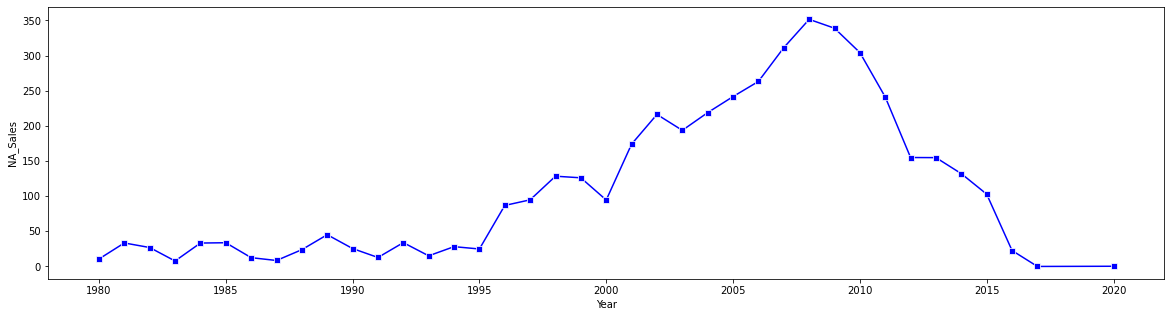

In [69]:
# visualizing the total sales  trend between 1980 to 2020 in North America
fig, ax = plt.subplots(figsize=(20, 5))
sns.lineplot(yearly_sales["Year"], yearly_sales["NA_Sales"], marker = "s", color="b")

The line plot above shows the total game sold from 1980 to 2020 in North America and we can see the rise in sales started after 1995 , the maximum sales generated occured in 2009. However, the sales starts to drop continiously from 2010.

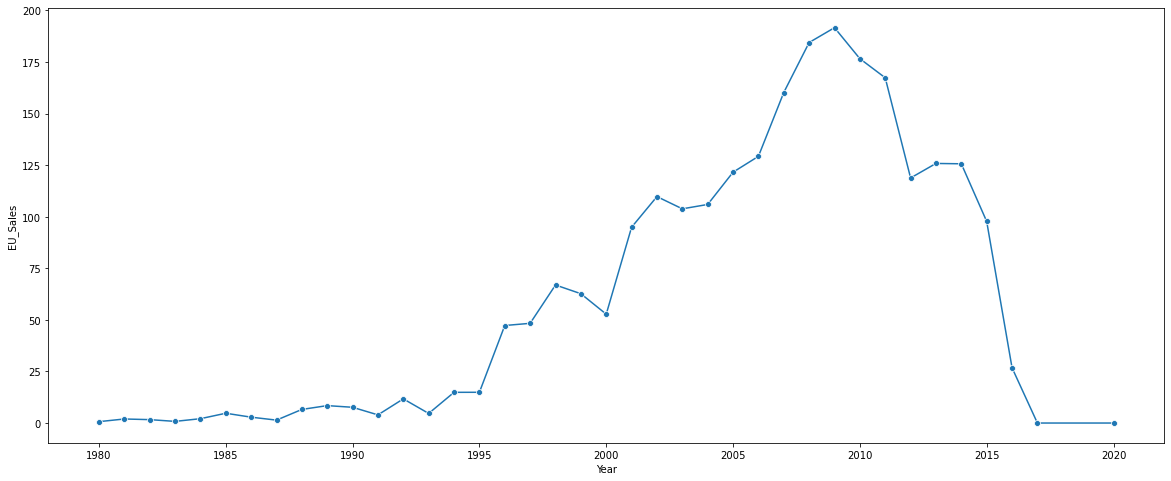

In [34]:
# visualizing the total sales  trend between 1980 to 2020 in Europe
fig, ax = plt.subplots(figsize=(20, 8))
yearly_sales = df.groupby("Year", as_index = False)["EU_Sales"].sum()
sns.lineplot(yearly_sales["Year"], yearly_sales["EU_Sales"], marker = "o")

The above graph shows the same trend as in the North America with the peak year was also 2009, the rise also start from 1995 as well while the drop contines to steep from 2010.

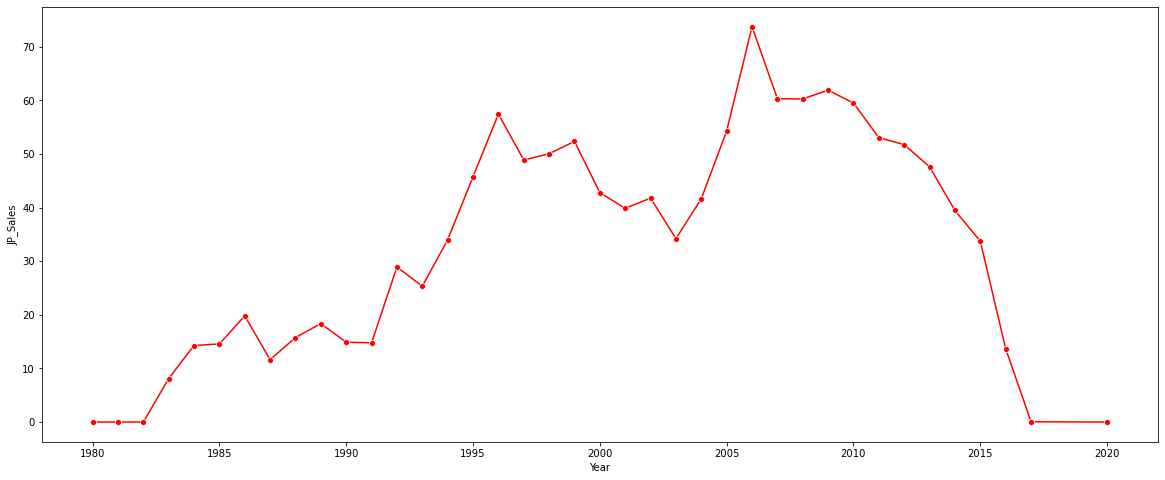

In [49]:
# visualizing the total sales  trend between 1980 to 2020 in Japan
fig, ax = plt.subplots(figsize=(20, 8))
yearly_sales = df.groupby("Year", as_index = False)["JP_Sales"].sum()
sns.lineplot(yearly_sales["Year"], yearly_sales["JP_Sales"], marker = "o", color="r")

This line plot differs from the North america and the Europe, video games sales has been showing increase in revenues from 1983 up to 1996, however the sales falls for 7 years befor starting to grow massively from 2004 to 2006 which recoreded the highes salesin japan before dropping low till 2020.

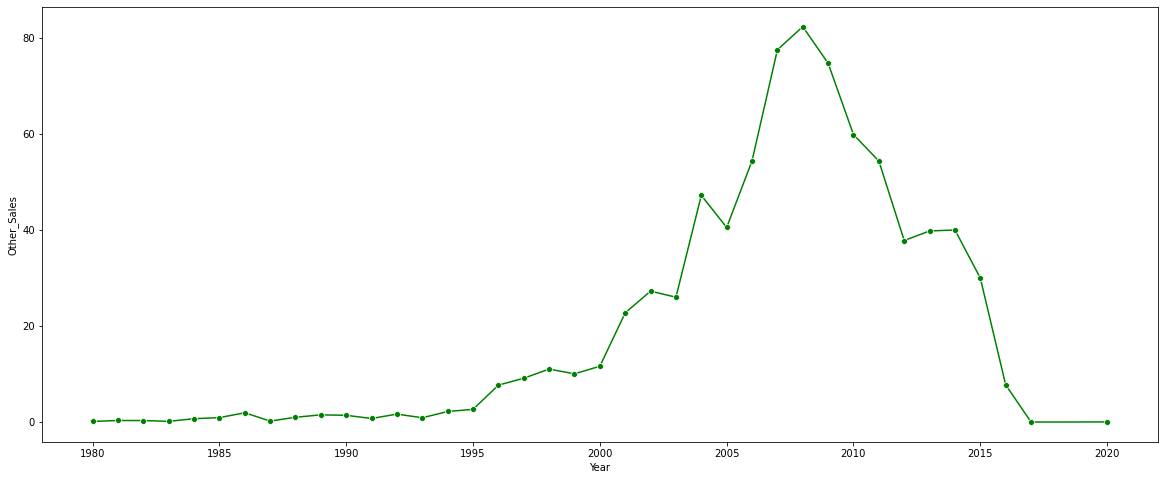

In [48]:
# visualizing the total sales  trend between 1980 to 2020 in Other countries combined
fig, ax = plt.subplots(figsize=(20, 8))
yearly_sales = df.groupby("Year", as_index = False)["Other_Sales"].sum()
sns.lineplot(yearly_sales["Year"], yearly_sales["Other_Sales"], marker = "o", color="g")

The year with the highest peak occured in 2008, the sales from 1980 to 1995 seems to be uniform untill 1996 when it begin to rise.

In [70]:
publisher = df.groupby("Publisher")["Global_Sales"].sum().reset_index()

In [71]:
publisher

,Publisher,Global_Sales
0,10TACLE Studios,0.11
1,1C Company,0.10
2,20th Century Fox Video Games,1.94
3,2D Boy,0.04
4,3DO,10.12
...,...,...
571,id Software,0.03
572,imageepoch Inc.,0.04
573,inXile Entertainment,0.10
574,"mixi, Inc",0.86


In [72]:
#checking the publisher with the highest video games sales 
publisher = publisher.sort_values("Global_Sales", ascending = False).head(10)

In [79]:
publisher.reset_index(drop=True)

,Publisher,Global_Sales
0,Nintendo,1784.43
1,Electronic Arts,1093.39
2,Activision,721.41
3,Sony Computer Entertainment,607.28
4,Ubisoft,473.54
5,Take-Two Interactive,399.30
6,THQ,340.44
7,Konami Digital Entertainment,278.56
8,Sega,270.70
9,Namco Bandai Games,253.65


/Users/mayowaakinyele/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


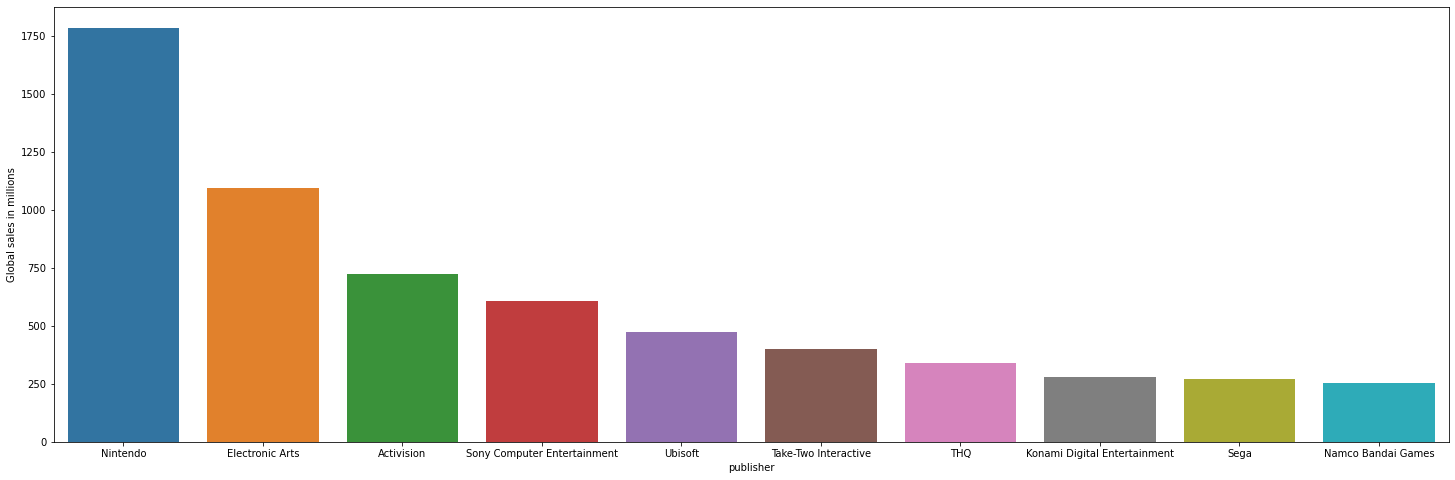

In [88]:
fig, ax = plt.subplots(figsize=(25, 8))
ax = sns.barplot(publisher["Publisher"], publisher["Global_Sales"])
ax.set(xlabel='publisher', ylabel='Global sales in millions')
plt.show()

Above barplot shows the top 10 game publishers with the highhest global revenue, Nintendo recouped $1,750,000,000.

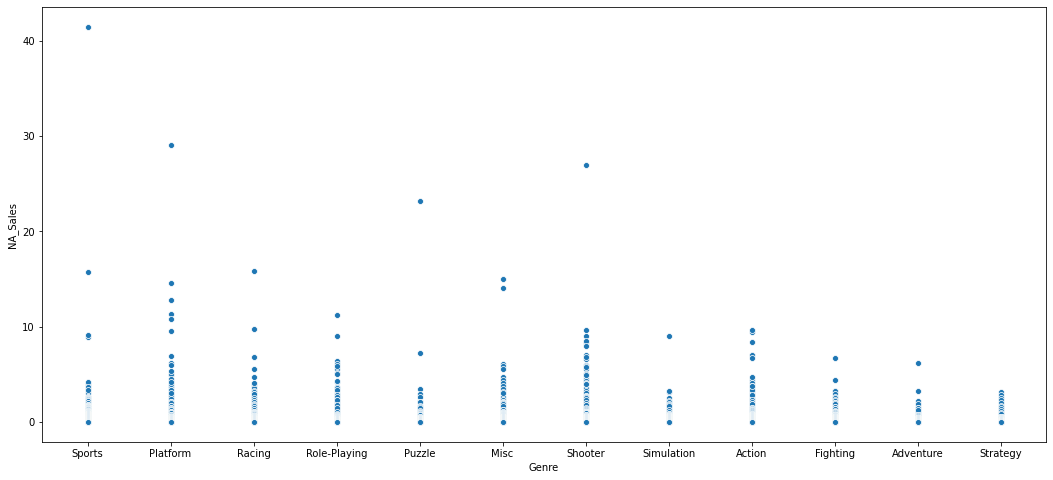

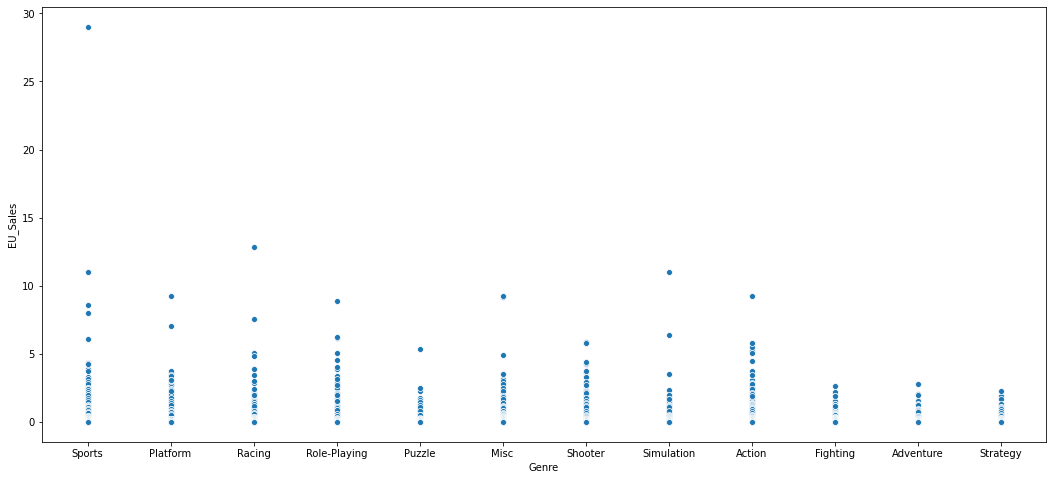

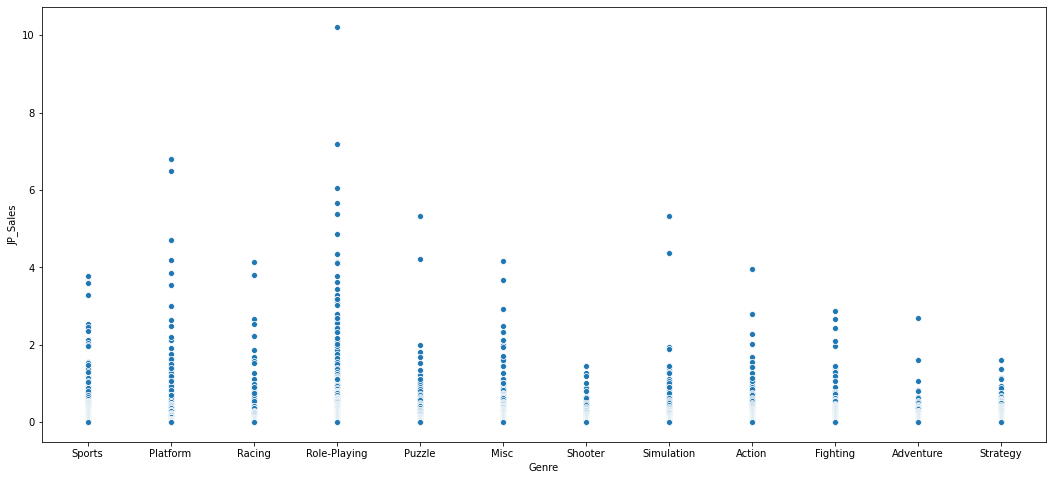

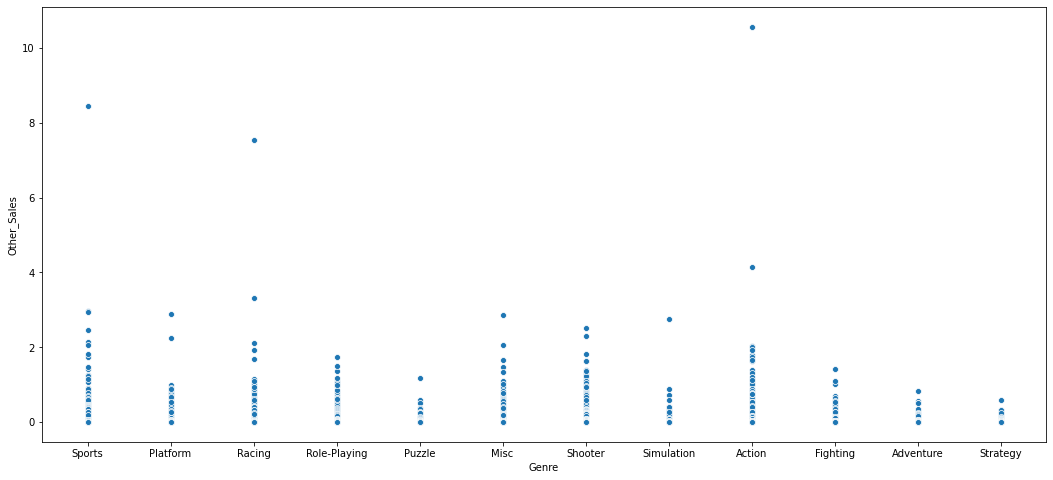

In [67]:
#checking the video game sales variability in all regions to visualize how spread out the sales.
region = ["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]

for i in region:
    fig, ax = plt.subplots(figsize=(18, 8))
    sns.scatterplot(data = df, x = "Genre", y = i)

The variablity visualization above makes it evident on how the sales in all regions varies from one another , which confirm 
again that the North America sales has the highest standard of deviation with other countries sales being least .

In [53]:
total_sales = df.groupby("Genre", as_index = False)[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"]].sum()

In [54]:
total_sales

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Action,861.77,516.48,158.65,184.92,1722.84
1,Adventure,101.93,63.74,51.99,16.70,234.59
2,Fighting,220.74,100.00,87.15,36.19,444.05
3,Misc,396.92,211.77,106.67,73.92,789.87
4,Platform,445.99,200.65,130.65,51.51,829.13
5,Puzzle,122.01,50.52,56.68,12.47,242.21
6,Racing,356.93,236.31,56.61,76.68,726.76
7,Role-Playing,326.50,187.57,350.29,59.38,923.83
8,Shooter,575.16,310.45,38.18,101.90,1026.20
9,Simulation,181.78,113.02,63.54,31.36,389.98


Above Dataframe highlights the total sales of each Genre in North America, Europe, Japan,

Other countries and the total global sales of each Genre, with all numbers represented in millions.

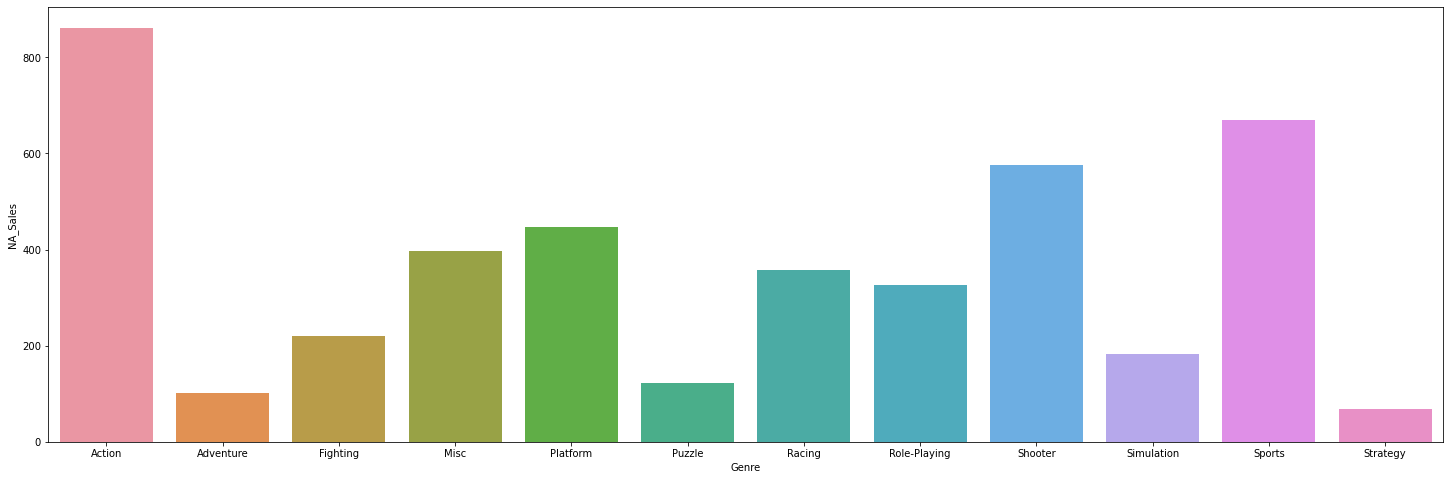

In [56]:
# Graphical representation of the total sales of each region
fig, ax = plt.subplots(figsize=(25, 8))
sns.barplot(data=total_sales, x = "Genre", y = "NA_Sales")

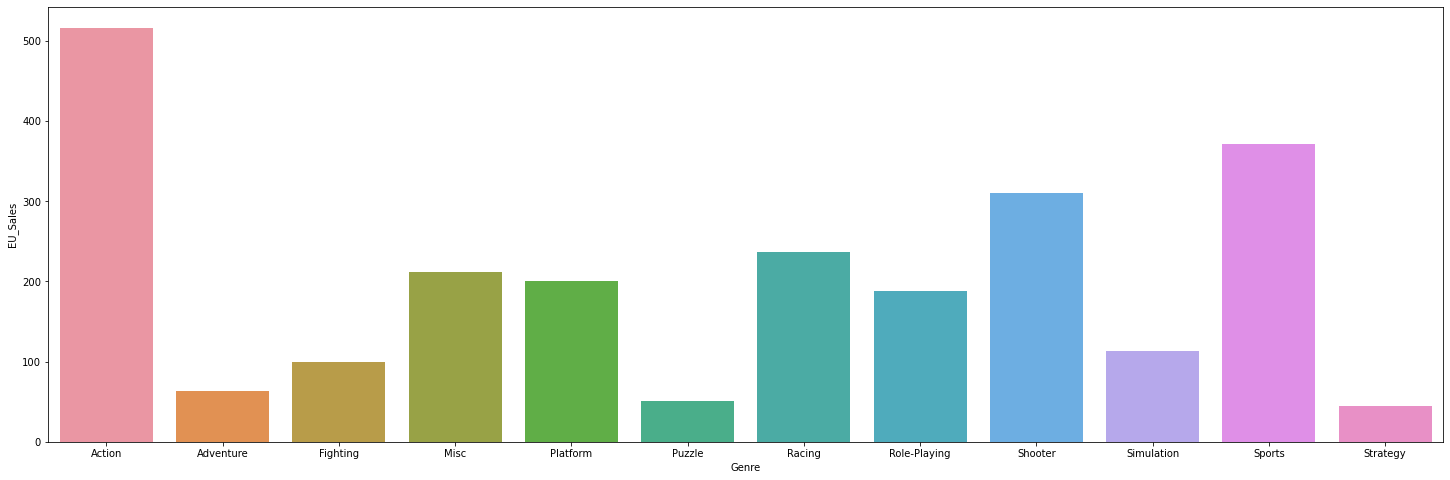

In [57]:
fig, ax = plt.subplots(figsize=(25, 8))
sns.barplot(data=total_sales, x = "Genre", y = "EU_Sales")

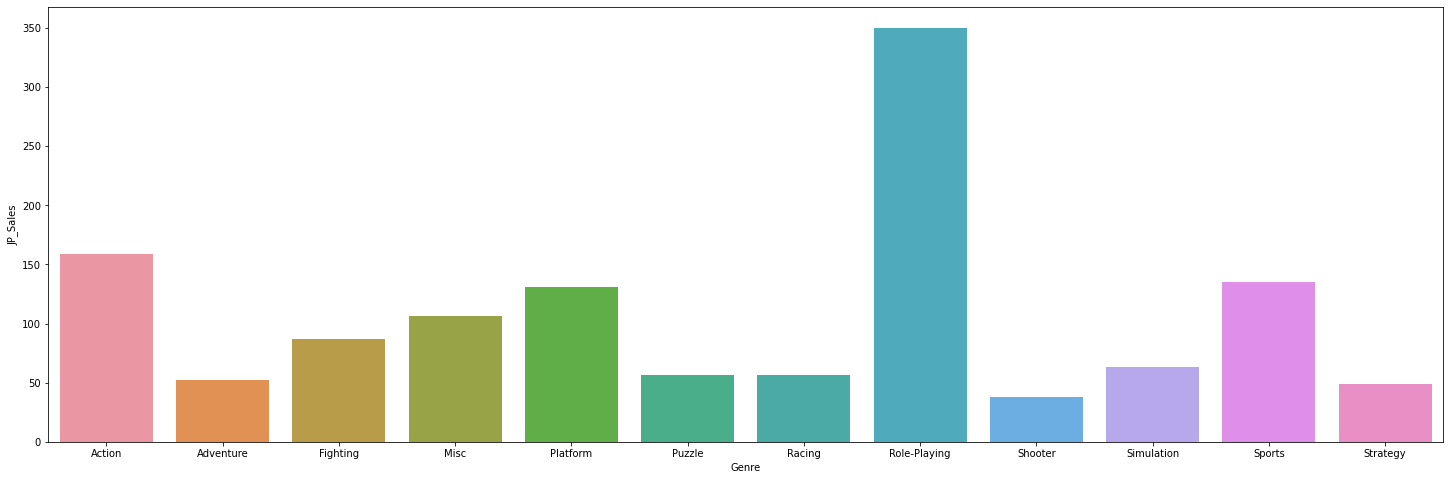

In [58]:
fig, ax = plt.subplots(figsize=(25, 8))
sns.barplot(data=total_sales, x = "Genre", y = "JP_Sales")

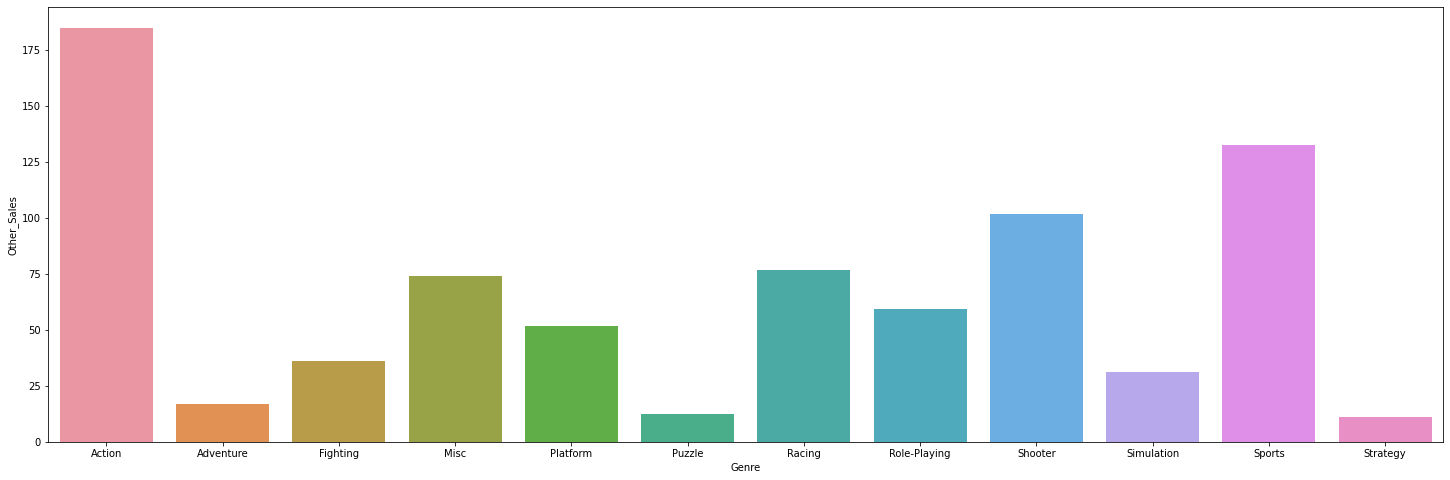

In [59]:
fig, ax = plt.subplots(figsize=(25, 8))
sns.barplot(data=total_sales, x = "Genre", y = "Other_Sales")

The bar plots above shows Action and sports genre games are the most dominant in terms of revenue in the world except for japan whose Role-playing genre has the highest revenue.

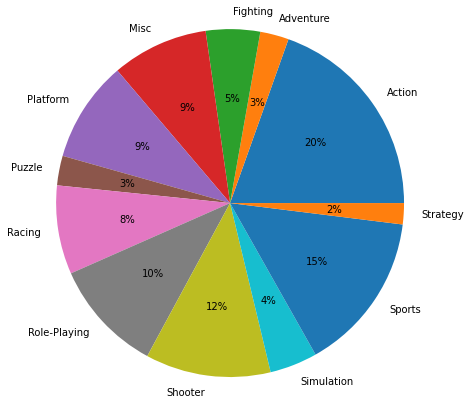

In [91]:
#the overall video game sales among Genre.
plt.pie(all_sales.Global_Sales, labels = all_sales.Genre, radius = 2, autopct = "%0.0f%%")
plt.show()

The pie chart above shows that Action, Sports and shooter video games are the top 3 Genre with the biggest global sales, taking 
a whooping 47% of the entire global sales. While Strategy, Puzzle and Adventure occupy the bottom three.

CONCLUSION :  Action games are the most popular Game genre around the world with a total global sales of a little over 1.7 billion. Sport Genre is the second both in popularity and sales recorded globally with a little over 1.3 billion. However, Strategy Genre is the least in popularity and with the lowest global sales of just 173 million.
After the exploration of this Dataset, its evident that Action, Sport and Shooter video game genres are the proposed genres for individual looking to invest in the video games industry in any part of the word except for Japan whose the ideal genre would be Role-Playing. 

In [91]:
import numpy as np

In [96]:
x = [1, 2, 2, 1, 3, 10, 10]

In [97]:
y = [1, 2, 3, 2, 50]

In [98]:
np.std(x)

3.7579846965616874

In [93]:
np.std(y)

19.21041384249699

In [107]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [108]:
np.percentile(x, 80)

11.4